# South Australia Road Crash Analysis

Dataset Info: Sample Data Set containing SA Crash data and showing severity of crash

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

# Load The Data File

In [2]:
df = pd.read_csv("2019_DATA_SA_Crash.csv")

Look at the top 5 records of data


In [3]:
print(df.head())

          REPORT_ID      Stats Area             Suburb  Postcode  \
0  2019-1-8/07/2020  2 Metropolitan  HAMPSTEAD GARDENS      5086   
1  2019-2-8/07/2020  2 Metropolitan          DRY CREEK      5094   
2  2019-3-8/07/2020  2 Metropolitan           MILE END      5031   
3  2019-4-8/07/2020  2 Metropolitan          PARALOWIE      5108   
4  2019-5-8/07/2020  2 Metropolitan       MOUNT BARKER      5251   

                         LGA Name  Total Units  Total Cas  Total Fats  \
0   CITY OF PORT ADELAIDE ENFIELD            2          0           0   
1               CITY OF SALISBURY            2          0           0   
2            CITY OF WEST TORRENS            2          1           0   
3               CITY OF SALISBURY            2          1           0   
4  DC MT.BARKER.                             2          0           0   

   Total SI  Total MI  ...        Crash Type Unit Resp   Entity Code  \
0         0         0  ...       Right Angle         1  Driver Rider   
1       

Check the various attributes of data like shape (rows and cols), Columns, datatypes


In [4]:
df.shape

(12964, 33)

In [5]:
df.columns.values

array(['REPORT_ID', 'Stats Area', 'Suburb', 'Postcode', 'LGA Name',
       'Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI',
       'Year', 'Month', 'Day', 'Time', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type',
       'Unit Resp', 'Entity Code', 'CSEF Severity', 'Traffic Ctrls',
       'DUI Involved', 'Drugs Involved', 'ACCLOC_X', 'ACCLOC_Y',
       'UNIQUE_LOC'], dtype=object)

In [6]:
#rename specific column names
df.rename(columns = {'Stats Area':'Stats_Area', 'Total Cas':'Total_Cas', 'CSEF Severity':'CSEF_Severity', 'Stats Area':'Stats_Area', 'LGA Name':'LGA_Name', 'Total Units':'Total_Units', 'Total Fats':'Total_Fats', 'Total SI':'Total_SI', 'Total MI':'Total_MI', 'Crash Type':'Crash_Type', 'Position Type':'Position_Type','Horizontal Align':'Horizontal_Align','Vertical Align':'Vertical_Align','Road Surface':'Road_Surface'}, inplace = True)

In [7]:
# Checking the data types of all the columns
df.dtypes

REPORT_ID            object
Stats_Area           object
Suburb               object
Postcode              int64
LGA_Name             object
Total_Units           int64
Total_Cas             int64
Total_Fats            int64
Total_SI              int64
Total_MI              int64
Year                  int64
Month                object
Day                  object
Time                 object
Area Speed            int64
Position_Type        object
Horizontal_Align     object
Vertical_Align       object
Other Feat           object
Road_Surface         object
Moisture Cond        object
Weather Cond         object
DayNight             object
Crash_Type           object
Unit Resp             int64
Entity Code          object
CSEF_Severity        object
Traffic Ctrls        object
DUI Involved         object
Drugs Involved       object
ACCLOC_X            float64
ACCLOC_Y            float64
UNIQUE_LOC          float64
dtype: object

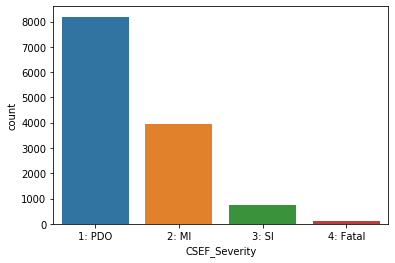

In [8]:
# count plot on single categorical variable
sns.countplot(x ='CSEF_Severity', data = df)
 
# Show the plot
plt.show()

In [9]:
100*df['CSEF_Severity'].value_counts()/len(df['CSEF_Severity'])

1: PDO      63.159519
2: MI       30.368713
3: SI        5.623264
4: Fatal     0.848504
Name: CSEF_Severity, dtype: float64

 * Data is highly imbalanced, ratio = 63:15
 
 * So we analyse the data with other features while taking the target values separately to get some insights.


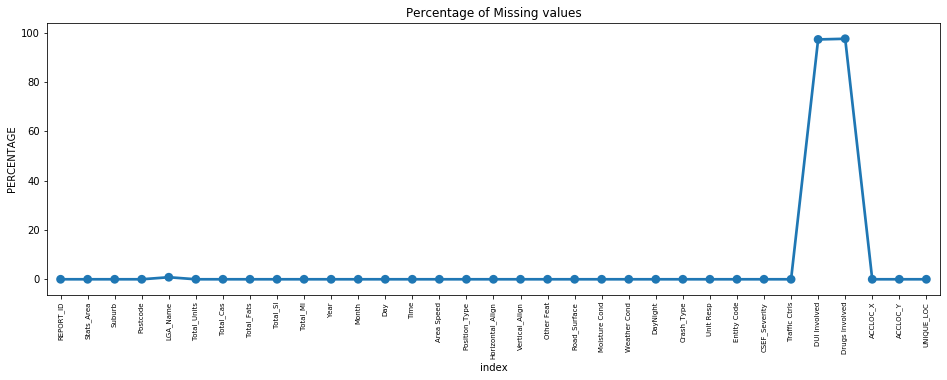

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Finding Missing Value

Missing Data - Initial Intuition
Here, we have missing value in LGA_Name and DUI involved and Drug involved.
General Thumb Rules:

*For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
*For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
*As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally column can be deleted, if more than 30-40% of missing values in column.


# Data Cleaning

1. Create a copy of base data for manupulation & processing

In [11]:
df_data1= df.copy()


2. Replace Nan value with N as its more than 97 % and cannot be deleted

In [12]:
df_data1['DUI Involved'] = df_data1['DUI Involved'].fillna('N')

In [13]:
df_data1['Drugs Involved'] = df_data1['Drugs Involved'].fillna('N')

3. Replace Missing value with NaN and Drop NaN Rows

In [14]:
df_data1.replace(r'^\s*$', float('NaN'), regex=True)


,REPORT_ID,Stats_Area,Suburb,Postcode,LGA_Name,Total_Units,Total_Cas,Total_Fats,Total_SI,Total_MI,...,Crash_Type,Unit Resp,Entity Code,CSEF_Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,N,N,1331810.03,1676603.26,1.331810e+13
1,2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,...,Rear End,2,Driver Rider,1: PDO,No Control,N,N,1328376.20,1682942.63,1.328380e+13
2,2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,...,Hit Pedestrian,1,Driver Rider,2: MI,No Control,N,N,1325819.68,1670994.26,1.325820e+13
3,2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,...,Hit Fixed Object,1,Driver Rider,3: SI,No Control,N,N,1328320.60,1690237.08,1.328320e+13
4,2019-5-8/07/2020,2 Metropolitan,MOUNT BARKER,5251,DC MT.BARKER.,2,0,0,0,0,...,Hit Animal,2,Animal,1: PDO,No Control,N,N,1353279.99,1655645.15,1.353280e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,2019-12960-8/07/2020,2 Metropolitan,REGENCY PARK,5010,CITY OF PORT ADELAIDE ENFIELD,2,1,0,0,1,...,Rear End,2,Driver Rider,2: MI,Traffic Signals,N,N,1326053.17,1676365.57,1.326050e+13
12960,2019-12961-8/07/2020,2 Metropolitan,ALBERTON,5014,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Hit Parked Vehicle,1,Driver Rider,1: PDO,No Control,N,N,1320976.21,1678869.06,1.320980e+13
12961,2019-12962-8/07/2020,3 Country,MOUNT GAMBIER,5290,CC MT.GAMBIER.,2,1,0,0,1,...,Side Swipe,2,Driver Rider,2: MI,No Control,N,N,1510085.19,1341596.93,1.510090e+13
12962,2019-12963-8/07/2020,2 Metropolitan,LOBETHAL,5241,THE ADELAIDE HILLS COUNCIL,2,0,0,0,0,...,Other,1,Driver Rider,1: PDO,No Control,N,N,1352064.89,1673448.83,1.352070e+13


In [15]:
df_data1.dropna()

,REPORT_ID,Stats_Area,Suburb,Postcode,LGA_Name,Total_Units,Total_Cas,Total_Fats,Total_SI,Total_MI,...,Crash_Type,Unit Resp,Entity Code,CSEF_Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Right Angle,1,Driver Rider,1: PDO,Give Way Sign,N,N,1331810.03,1676603.26,1.331810e+13
1,2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,...,Rear End,2,Driver Rider,1: PDO,No Control,N,N,1328376.20,1682942.63,1.328380e+13
2,2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,...,Hit Pedestrian,1,Driver Rider,2: MI,No Control,N,N,1325819.68,1670994.26,1.325820e+13
3,2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,...,Hit Fixed Object,1,Driver Rider,3: SI,No Control,N,N,1328320.60,1690237.08,1.328320e+13
4,2019-5-8/07/2020,2 Metropolitan,MOUNT BARKER,5251,DC MT.BARKER.,2,0,0,0,0,...,Hit Animal,2,Animal,1: PDO,No Control,N,N,1353279.99,1655645.15,1.353280e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,2019-12960-8/07/2020,2 Metropolitan,REGENCY PARK,5010,CITY OF PORT ADELAIDE ENFIELD,2,1,0,0,1,...,Rear End,2,Driver Rider,2: MI,Traffic Signals,N,N,1326053.17,1676365.57,1.326050e+13
12960,2019-12961-8/07/2020,2 Metropolitan,ALBERTON,5014,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,...,Hit Parked Vehicle,1,Driver Rider,1: PDO,No Control,N,N,1320976.21,1678869.06,1.320980e+13
12961,2019-12962-8/07/2020,3 Country,MOUNT GAMBIER,5290,CC MT.GAMBIER.,2,1,0,0,1,...,Side Swipe,2,Driver Rider,2: MI,No Control,N,N,1510085.19,1341596.93,1.510090e+13
12962,2019-12963-8/07/2020,2 Metropolitan,LOBETHAL,5241,THE ADELAIDE HILLS COUNCIL,2,0,0,0,0,...,Other,1,Driver Rider,1: PDO,No Control,N,N,1352064.89,1673448.83,1.352070e+13


In [16]:
#drop column customerID and tenure
df_data1.drop(columns= ['REPORT_ID','Stats_Area','Year','Suburb','Postcode','LGA_Name','Time','ACCLOC_X','ACCLOC_Y','ACCLOC_Y','UNIQUE_LOC','Crash_Type','Position_Type'], axis=1, inplace=True)
df_data1.head()


,Total_Units,Total_Cas,Total_Fats,Total_SI,Total_MI,Month,Day,Area Speed,Horizontal_Align,Vertical_Align,...,Road_Surface,Moisture Cond,Weather Cond,DayNight,Unit Resp,Entity Code,CSEF_Severity,Traffic Ctrls,DUI Involved,Drugs Involved
0,2,0,0,0,0,June,Wednesday,60,Straight road,Level,...,Sealed,Dry,Not Raining,Daylight,1,Driver Rider,1: PDO,Give Way Sign,N,N
1,2,0,0,0,0,January,Tuesday,90,Straight road,Level,...,Sealed,Dry,Not Raining,Night,2,Driver Rider,1: PDO,No Control,N,N
2,2,1,0,0,1,January,Tuesday,60,Straight road,Level,...,Sealed,Dry,Not Raining,Night,1,Driver Rider,2: MI,No Control,N,N
3,2,1,0,1,0,January,Tuesday,50,"CURVED, VIEW OPEN",Level,...,Sealed,Dry,Not Raining,Night,1,Driver Rider,3: SI,No Control,N,N
4,2,0,0,0,0,January,Tuesday,110,Straight road,Slope,...,Sealed,Dry,Not Raining,Night,2,Animal,1: PDO,No Control,N,N


# Data Exploration
1. Plot distibution of individual predictors by CSEF Severity (SI = Serious Injury, MI = Minor Injury, PDO = Property Damage Only)

Univariate Analysis


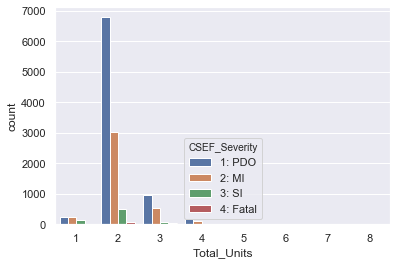

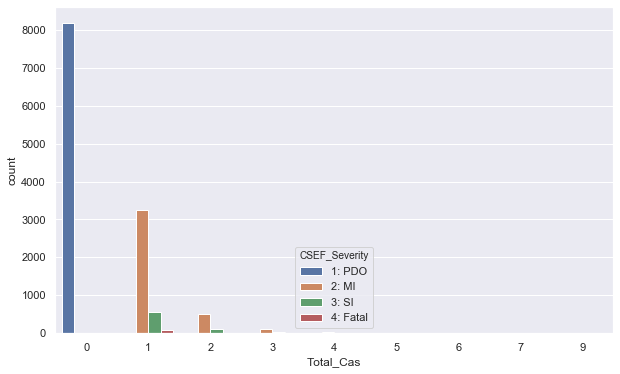

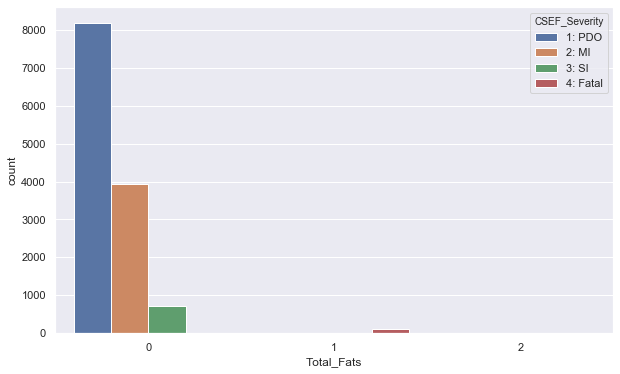

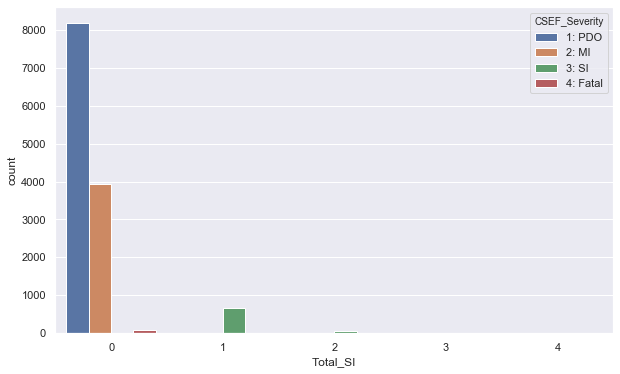

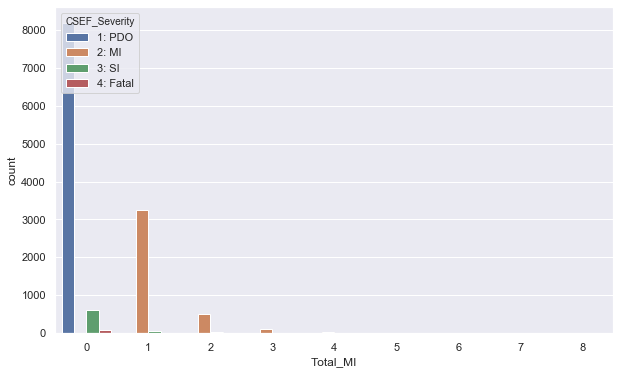

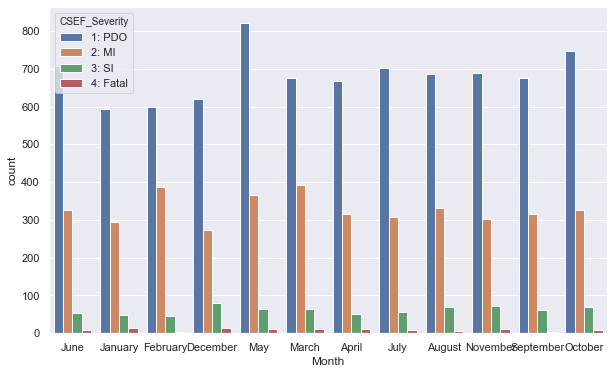

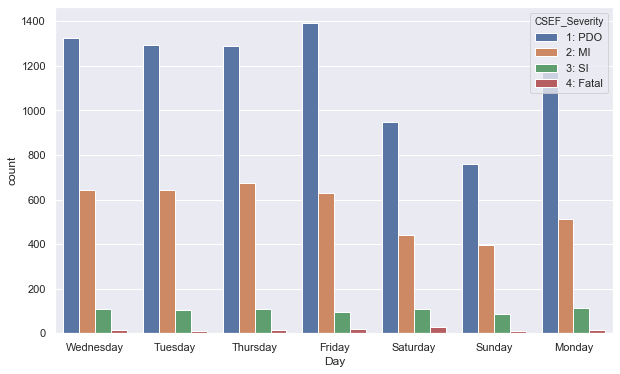

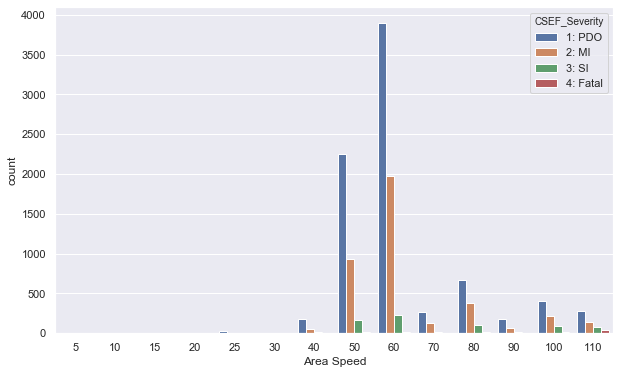

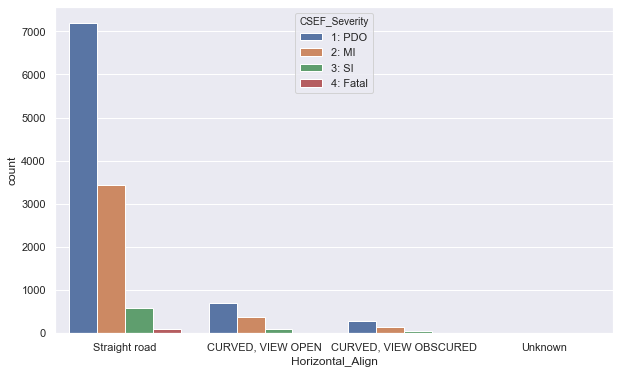

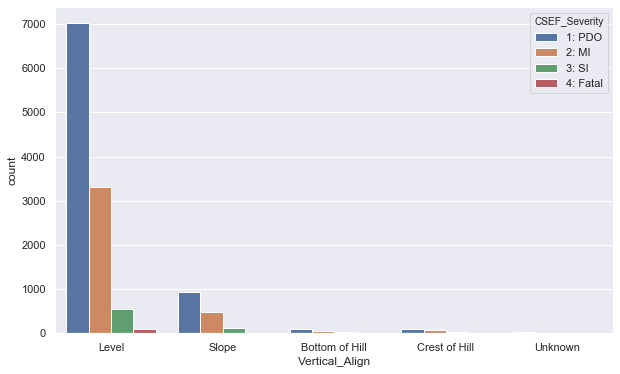

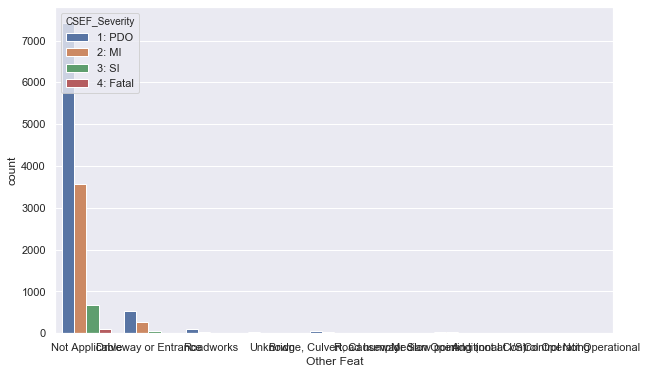

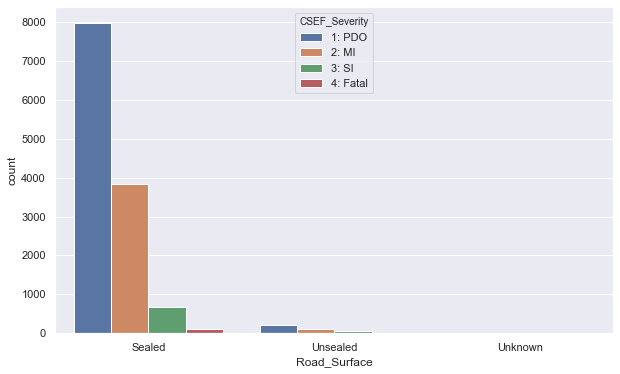

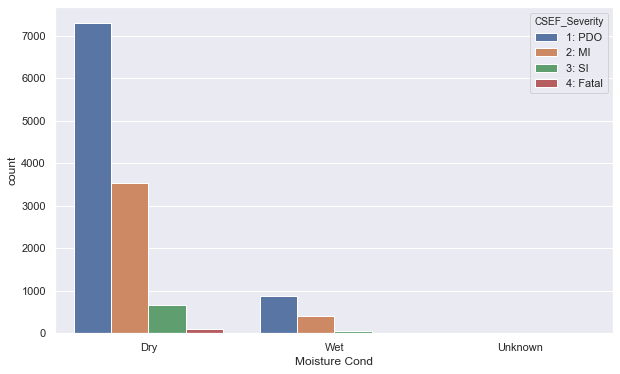

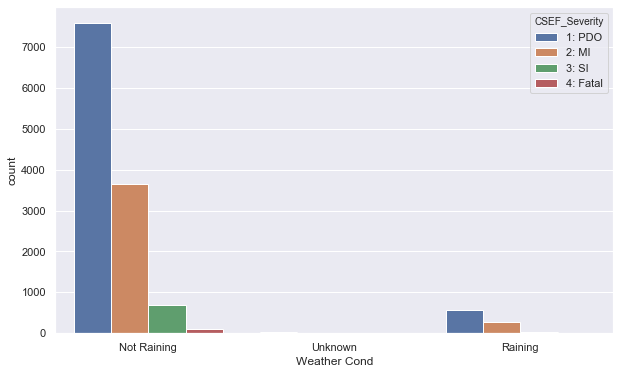

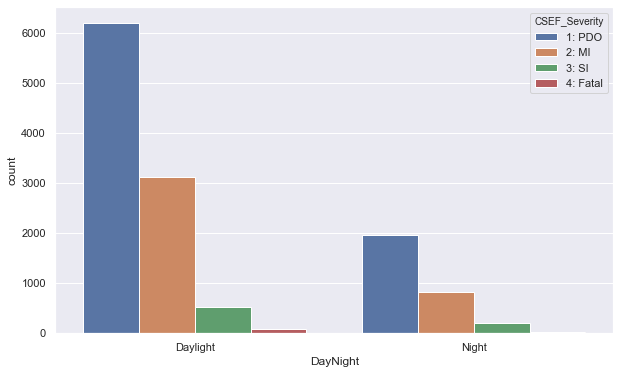

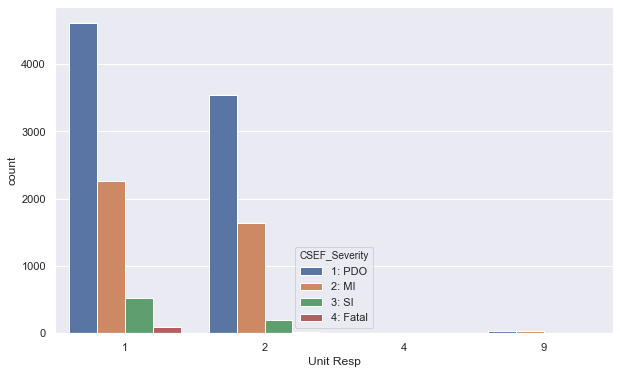

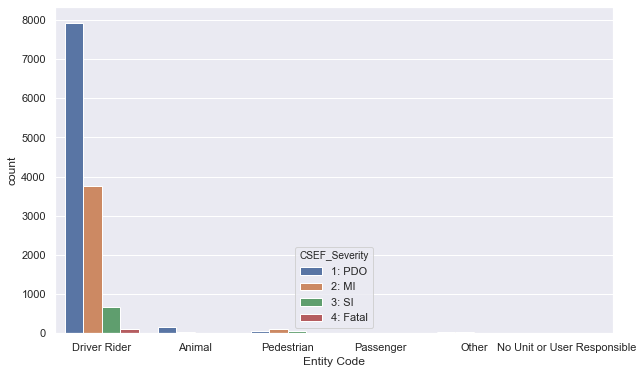

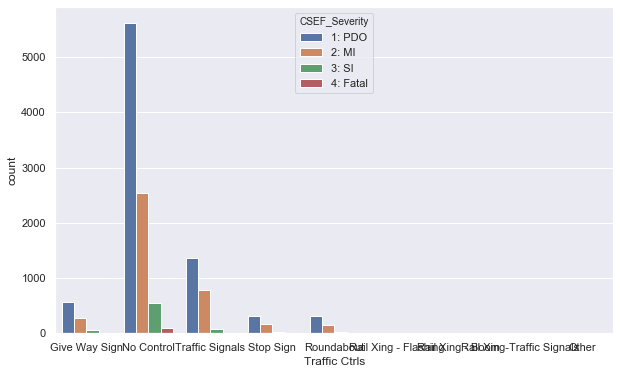

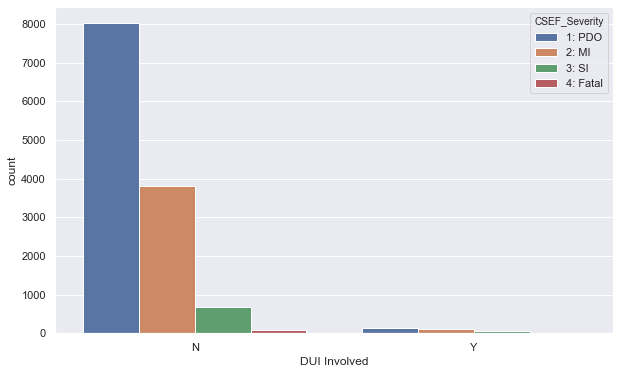

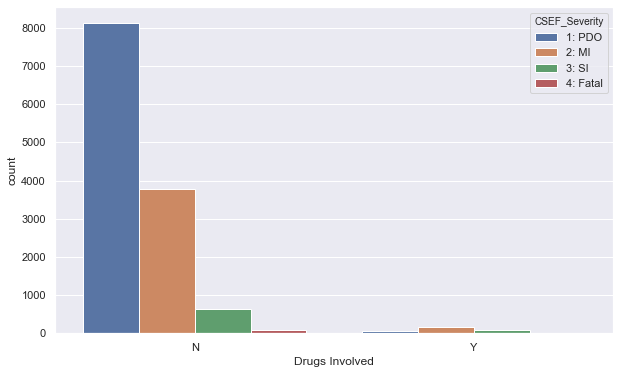

In [17]:
for i, predictor in enumerate(df_data1.drop(columns=['CSEF_Severity'])):
    plt.figure(i)
    sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4
    sns.countplot(data=df_data1, x=predictor, hue='CSEF_Severity')

2 Metropolitan    10402
3 Country          1897
1 City              665
Name: Stats_Area, dtype: int64


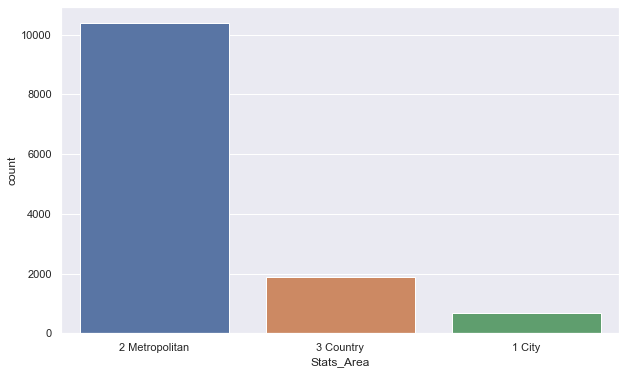

In [18]:
print(df.Stats_Area.value_counts())


# count plot on single categorical variable
sns.countplot(x ='Stats_Area', data = df)
 
# Show the plot
plt.show()

0    8188
1    3909
2     625
3     147
4      61
5      22
6       9
7       2
9       1
Name: Total_Cas, dtype: int64


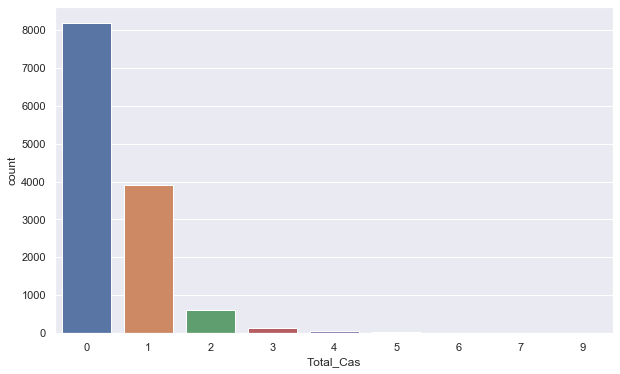

In [19]:
print(df.Total_Cas.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Total_Cas', data = df)
 
# Show the plot
plt.show()



CITY OF PORT ADELAIDE ENFIELD     1366
CITY OF SALISBURY                 1233
CITY OF CHARLES STURT              865
CITY OF ONKAPARINGA                843
CITY OF PLAYFORD.                  744
                                  ... 
DC KIMBA.                            4
MC ROXBY DOWNS                       3
DC ELLISTON.                         3
DC CLEVE.                            2
DC OF ORROROO/CARRIETON              2
Name: LGA_Name, Length: 68, dtype: int64


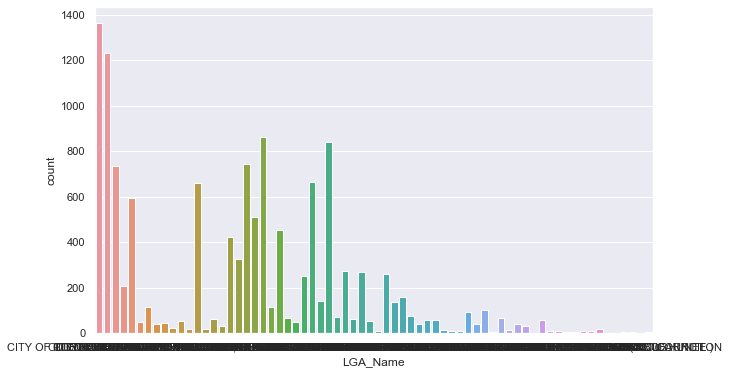

In [20]:
print(df.LGA_Name.value_counts())

# count plot on single categorical variable
sns.countplot(x ='LGA_Name', data = df)
 
# Show the plot
plt.show()

2    10399
3     1582
1      620
4      298
5       42
6       16
7        5
8        2
Name: Total_Units, dtype: int64


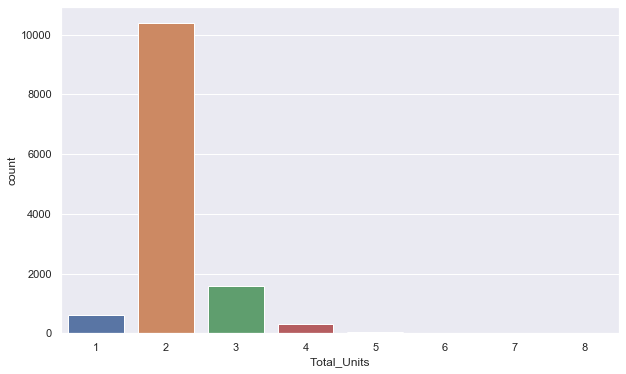

In [21]:
print(df.Total_Units.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Total_Units', data = df)
 
# Show the plot
plt.show()

0    12854
1      106
2        4
Name: Total_Fats, dtype: int64


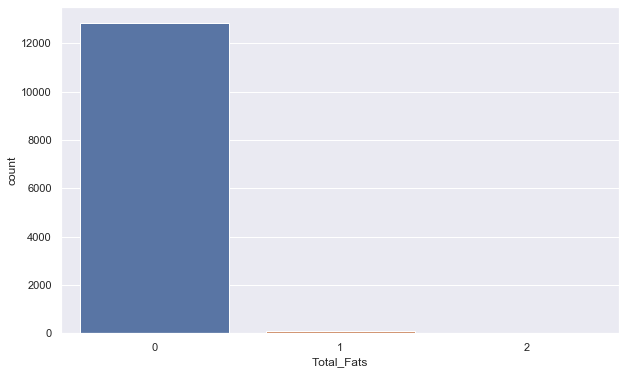

In [22]:
print(df.Total_Fats.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Total_Fats', data = df)
 
# Show the plot
plt.show()

0    12216
1      678
2       57
3       11
4        2
Name: Total_SI, dtype: int64


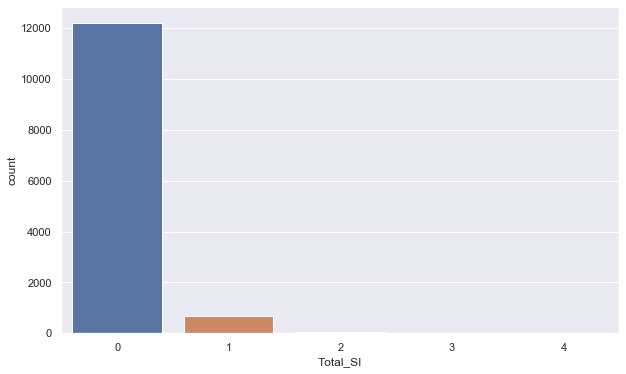

In [23]:
print(df.Total_SI.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Total_SI', data = df)
 
# Show the plot
plt.show()

0    8904
1    3342
2     527
3     119
4      44
5      17
6       8
7       2
8       1
Name: Total_MI, dtype: int64


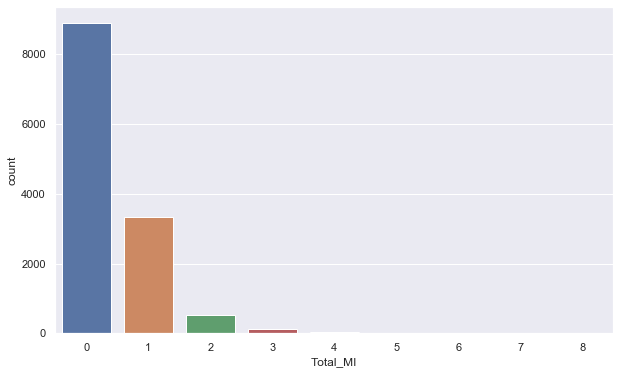

In [24]:
print(df.Total_MI.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Total_MI', data = df)
 
# Show the plot
plt.show()

Rear End                      3346
Right Angle                   2469
Hit Fixed Object              2012
Side Swipe                    1433
Right Turn                    1050
Hit Parked Vehicle             983
Roll Over                      544
Hit Pedestrian                 439
Head On                        244
Hit Animal                     186
Other                           96
Left Road - Out of Control      94
Hit Object on Road              68
Name: Crash_Type, dtype: int64


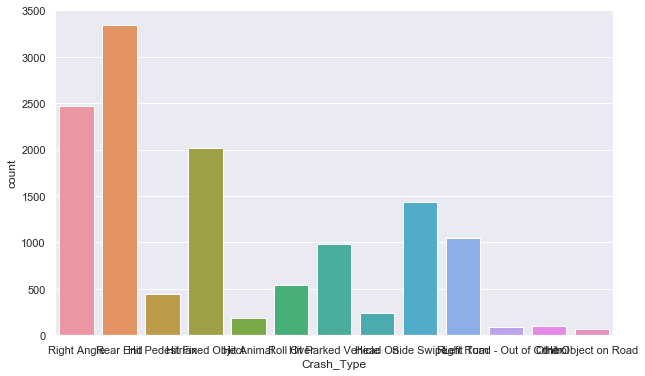

In [25]:
print(df.Crash_Type.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Crash_Type', data = df)
 
# Show the plot
plt.show()

May          1262
October      1151
March        1143
June         1096
August       1095
November     1078
July         1073
September    1054
April        1044
February     1035
December      985
January       948
Name: Month, dtype: int64


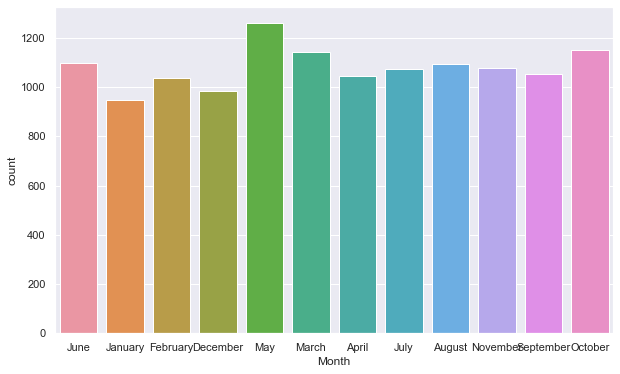

In [26]:
print(df.Month.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Month', data = df)
 
# Show the plot
plt.show()

Friday       2138
Wednesday    2099
Thursday     2083
Tuesday      2047
Monday       1821
Saturday     1523
Sunday       1253
Name: Day, dtype: int64


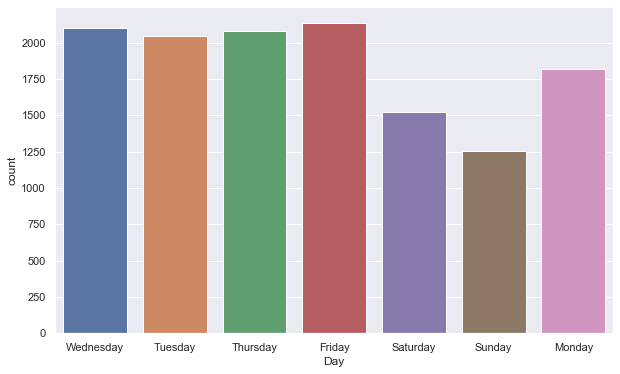

In [27]:
print(df.Day.value_counts())
# count plot on single categorical variable
sns.countplot(x ='Day', data = df)
 
# Show the plot
plt.show()

Not Divided            4166
T-Junction             3011
Cross Road             2737
Divided Road           2608
Freeway                 160
Multiple                109
Pedestrian Crossing      41
One Way                  32
Other                    22
Rail Crossing            21
Rail Xing                14
Interchange              12
Ramp Off                 12
Ramp On                   8
Y-Junction                8
Crossover                 3
Name: Position_Type, dtype: int64


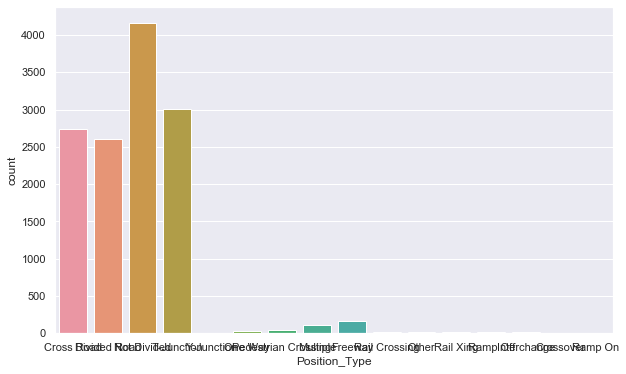

In [28]:
print(df.Position_Type.value_counts())
sns.countplot(x ='Position_Type', data = df)
 
# Show the plot
plt.show()

Straight road            11308
CURVED, VIEW OPEN         1175
CURVED, VIEW OBSCURED      475
Unknown                      6
Name: Horizontal_Align, dtype: int64


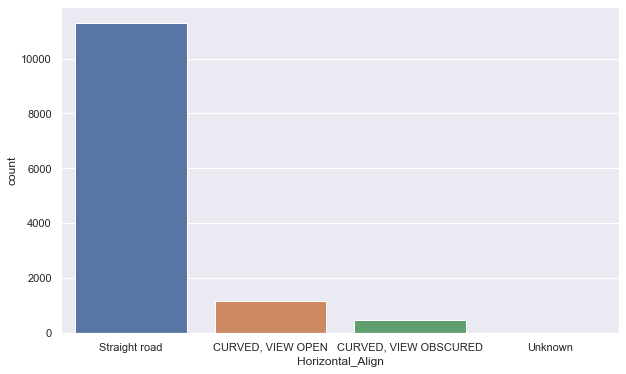

In [29]:
print(df.Horizontal_Align.value_counts())
sns.countplot(x ='Horizontal_Align', data = df)
 
# Show the plot
plt.show()

Level             10995
Slope              1564
Crest of Hill       205
Bottom of Hill      164
Unknown              36
Name: Vertical_Align, dtype: int64


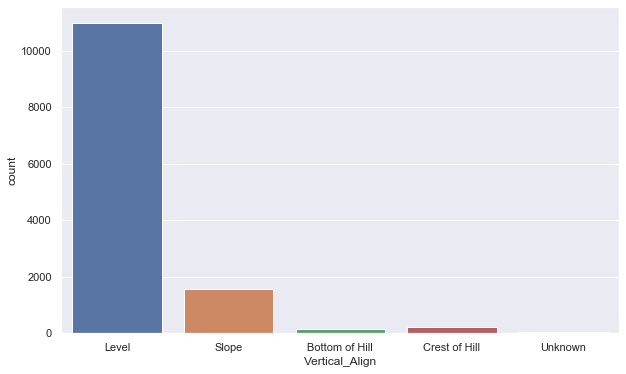

In [30]:
print(df.Vertical_Align.value_counts())
sns.countplot(x ='Vertical_Align', data = df)
 
# Show the plot
plt.show()

Sealed      12591
Unsealed      372
Unknown         1
Name: Road_Surface, dtype: int64


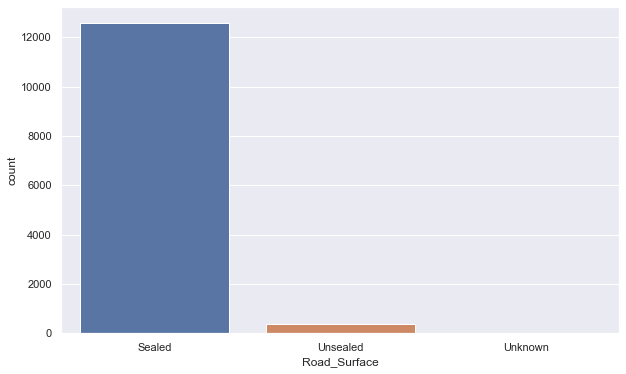

In [31]:
print(df.Road_Surface.value_counts())
sns.countplot(x ='Road_Surface', data = df)
 
# Show the plot
plt.show()